# Final Project

This final project can be collaborative. The maximum members of a group is 3. You can also work by yourself. Please respect the academic integrity. **Remember: if you get caught on cheating, you get F.**

## A Introduction to the competition

<img src="news-sexisme-EN.jpg" alt="drawing" width="380"/>

Sexism is a growing problem online. It can inflict harm on women who are targeted, make online spaces inaccessible and unwelcoming, and perpetuate social asymmetries and injustices. Automated tools are now widely deployed to find, and assess sexist content at scale but most only give classifications for generic, high-level categories, with no further explanation. Flagging what is sexist content and also explaining why it is sexist improves interpretability, trust and understanding of the decisions that automated tools use, empowering both users and moderators.

This project is based on SemEval 2023 - Task 10 - Explainable Detection of Online Sexism (EDOS). [Here](https://codalab.lisn.upsaclay.fr/competitions/7124#learn_the_details-overview) you can find a detailed introduction to this task.

You only need to complete **TASK A - Binary Sexism Detection: a two-class (or binary) classification where systems have to predict whether a post is sexist or not sexist**. To cut down training time, we only use a subset of the original dataset (5k out of 20k). The dataset can be found in the same folder. 

Different from our previous homework, this competition gives you great flexibility (and very few hints). You can freely determine every component of your workflow, including but not limited to:
-  **Preprocessing the input text**: You may decide how to clean or transform the text. For example, removing emojis or URLs, lowercasing, removing stopwords, applying stemming or lemmatization, correcting spelling, or performing tokenization and sentence segmentation.
-  **Feature extraction and encoding**: You can choose any method to convert text into numerical representations, such as TF-IDF, Bag-of-Words, N-grams, Word2Vec, GloVe, FastText, contextual embeddings (e.g., BERT, RoBERTa, or other transformer-based models), Part-of-Speech (POS) tagging, dependency-based features, sentiment or emotion features, readability metrics, or even embeddings or features generated by large language models (LLMs).
-  **Data augmentation and enrichment**: You may expand or balance your dataset by incorporating other related corpora or using techniques like synonym replacement, random deletion/insertion, or LLM-assisted augmentation (e.g., generating paraphrased or synthetic examples to improve model robustness).
-  **Model selection**: You are free to experiment with different models — from traditional machine learning algorithms (e.g., Logistic Regression, SVM, Random Forest, XGBoost) to deep learning architectures (e.g., CNNs, RNNs, Transformers), or even hybrid/ensemble approaches that combine multiple models or leverage LLM-generated predictions or reasoning.

## Requirements
-  **Input**: the text for each instance.
-  **Output**: the binary label for each instance.
-  **Feature engineering**: use at least 2 different methods to extract features and encode text into numerical values. You may explore both traditional and AI-assisted techniques. Data augmentation is optional.
-  **Model selection**: implement with at least 3 different models and compare their performance.
-  **Evaluation**: create a dataframe with rows indicating feature+model and columns indicating Precision (P), Recall (R) and F1-score (using weighted average). Your results should have at least 6 rows (2 feature engineering methods x 3 models). Report best performance with (1) your feature engineering method, and (2) the model you choose. Here is an example illustrating how the experimental results table should be presented.

| Feature + Model | Sexist (P) | Sexist (R) | Sexist (F1) | Non-Sexist (P) | Non-Sexist (R) | Non-Sexist (F1) | Weighted (P) | Weighted (R) | Weighted (F1) |
|-----------------|:----------:|:----------:|:------------:|:---------------:|:---------------:|:----------------:|:-------------:|:--------------:|:---------------:|
| TF-IDF + Logistic Regression | ... | ... | ... | ... | ... | ... | ... | ... | ... |

- **Format of the report**: add explainations for each step (you can add markdown cells). At the end of the report, write a summary for each sections: 
    - Data Preprocessing
    - Feature Engineering
    - Model Selection and Architecture
    - Training and Validation
    - Evaluation and Results
    - Use of Generative AI (if you use)

## Rules 
Violations will result in 0 points in the grade: 
-   `Rule 1 - No test set leakage`: You must not use any instance from the test set during training, feature engineering, or model selection.
-   `Rule 2 - Responsible AI use`: You may use generative AI, but you must clearly document how it was used. If you have used genAI, include a section titled “Use of Generative AI” describing:
    -   What parts of the project you used AI for
    -   What was implemented manually vs. with AI assistance

## Grading

The performance should be only evaluated on the test set (a total of 1086 instances). Please split original dataset into train set and test set. The test set should NEVER be used in the training process. The evaluation metric is a combination of precision, recall, and f1-score (use `classification_report` in sklearn). 

The total points are 10.0. Each team will compete with other teams in the class on their best performance. Points will be deducted if not following the requirements above. 

If ALL the requirements are met:
- Top 25\% teams: 10.0 points.
- Top 25\% - 50\% teams: 8.5 points.
- Top 50\% - 75\% teams: 7.0 points.
- Top 75\% - 100\% teams: 6.0 points.

If your best performance reaches **0.82** or above (weighted F1-score) and follows all the requirements and rules, you will also get full points (10.0 points). 

## Submission
Similar as homework, submit both a PDF and .ipynb version of the report including: 
- code and experimental results with details explained
- combined results table, report and best performance
- a summary at the end of the report (please follow the format above)

Missing any part of the above requirements will result in point deductions.

The due date is **Dec 11, Thursday by 11:59pm**.

In [1]:
'''
This cell is for calling all the imports
'''

import pandas as pd
import numpy as np
import re 
import html
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sentence_transformers import SentenceTransformer
!pip install wordsegment
from wordsegment import segment

In [2]:
'''
This cell initializes the random seed loads the data in, shows what it looks like
and provides percentages of sexist vs non sexist and train vs test in the data
IMPLEMENTED MANUALLY
'''
RANDOM_SEED = 24

np.random.seed(RANDOM_SEED)

data = "edos_labelled_data.csv"
df = pd.read_csv(data)

print(df.shape)

display(df.head())

print(df['label'].value_counts(normalize = True))
print(df['split'].value_counts(normalize = True))

(5279, 4)


,rewire_id,text,label,split
0,sexism2022_english-9609,"In Nigeria, if you rape a woman, the men rape ...",not sexist,train
1,sexism2022_english-16993,"Then, she's a keeper. 😉",not sexist,train
2,sexism2022_english-13149,This is like the Metallica video where the poo...,not sexist,train
3,sexism2022_english-13021,woman?,not sexist,train
4,sexism2022_english-966,I bet she wished she had a gun,not sexist,train


label
not sexist    0.705247
sexist        0.294753
Name: proportion, dtype: float64
split
train    0.794279
test     0.205721
Name: proportion, dtype: float64


In [3]:
'''
This cell contains the function to process the input from the data
'''
# print(df['text'].head(5))

# print(df['label'].value_counts())
# print(df.isnull().sum())
# print(df.duplicated().sum())

def split_hashtag(word):
    hashtag = word.group(1)
    return segment(hashtag)

def preprocess_text(s):
    if isinstance(s, str):
        s = html.unescape(s)
        s = re.sub(r'[^a-zA-Z\s]', '', s)
        s = s.strip()
        s = s.lower()
        s = re.sub(r'http\S+|www\S+', '', s)
        s = re.sub(r'@(\w+)', '', s)
        s = re.sub(r'#(\w+)', split_hashtag, s)
        s = re.sub(r'\s+', ' ', s).strip()
        return s
    else:
        return ""

df['clean_text'] = df['text'].apply(preprocess_text)

# print(df['clean_text'].head(5))


In [4]:
'''
This cell is to seperate the set into training and test set
'''

train_df = df[df['split'] == 'train'].copy()
test_df = df[df['split'] == 'test'].copy()

print(train_df.columns)
print(test_df.columns)



Index(['rewire_id', 'text', 'label', 'split', 'clean_text'], dtype='object')
Index(['rewire_id', 'text', 'label', 'split', 'clean_text'], dtype='object')


In [5]:
'''
Setup the training data for use later on 
'''
# Training Data
X_train = train_df['clean_text']
y_train = train_df['label']

# Test Data
X_test = test_df['clean_text']
y_test = test_df['label']


## Feature Engineering Method 1 + 3 Models 
• Method 1: TF-IDF

• Models: Logistic Regression, Linear SVC, Random Forest


In [6]:
'''
This cell will set up TfidVectorizer so we can fit the training data
and transform the test data
'''
vectorizer = TfidfVectorizer(max_features = 20000,
                            # includes single and 3 word phrases
                            ngram_range = (1, 3), 
                            # word only gets added if appears more than 2
                            min_df = 2,
                            # if word appears more than 90% of time then not included
                            max_df = .9)


X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

print("TF-IDF shape: " + str(X_train_vect.shape))
print("Vocabulary Size: " + str(len(vectorizer.vocabulary_)))

TF-IDF shape: (4193, 16285)
Vocabulary Size: 16285


In [7]:
'''
This cell is for the helper function I will be using to create the new data frame
for the final results. Used Generative AI to come up with this helper function
for quickly adding the results of models to a list
'''
results = []

def add_result(feature_name, model_name, y_true, y_pred):
    rep = classification_report(y_true, y_pred, output_dict=True, zero_division=0)

    row = {"Feature + Model": feature_name + " + " + model_name}

    # class labels only (gets Sexist + Non-Sexist labels only)
    classes = [c for c in rep if c not in ("accuracy", "macro avg", "weighted avg")]

    # per-class metrics (no f-strings)
    for c in classes:
        metrics = rep[c]
        row[c + " (P)"] = metrics["precision"]
        row[c + " (R)"] = metrics["recall"]
        row[c + " (F1)"] = metrics["f1-score"]

    # weighted metrics
    weighted = rep["weighted avg"]
    row["Weighted (P)"] = weighted["precision"]
    row["Weighted (R)"] = weighted["recall"]
    row["Weighted (F1)"] = weighted["f1-score"]

    results.append(row)



In [8]:
'''
This cell trains Logistic Regression model
'''

logReg = LogisticRegression(max_iter = 500, random_state = RANDOM_SEED)

logReg.fit(X_train_vect, y_train)
logReg_pred = logReg.predict(X_test_vect)

add_result("TF-IDF", "Logistic Regression", y_test, logReg_pred)

print("Trained the TF-IDF + Logistic Regression model!")

Trained the TF-IDF + Logistic Regression model!


In [9]:
'''
This cell trains the Linear SVC Model
'''

linSVC = LinearSVC(max_iter = 100, random_state = RANDOM_SEED)

linSVC.fit(X_train_vect, y_train)

linSVC_pred = linSVC.predict(X_test_vect)

add_result("TF-IDF", "LinearSVC", y_test, linSVC_pred)

print("Trained the TF-IDF + LinearSVC!")

Trained the TF-IDF + LinearSVC!


In [10]:
'''
This cell trains the Random Forest
'''

rf = RandomForestClassifier(n_estimators = 200, random_state = RANDOM_SEED, n_jobs = 1)
rf.fit(X_train_vect, y_train)
pred_rf = rf.predict(X_test_vect)
add_result("TF-IDF", "Random Forest", y_test, pred_rf)

print("Trained the TF-IDF + Random Forest!")

Trained the TF-IDF + Random Forest!


In [11]:
'''

'''

sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

X_train_sbert = sbert_model.encode(X_train.tolist(), show_progress_bar = True, batch_size = 32)

X_test_sbert = sbert_model.encode(X_test.tolist(), show_progress_bar = True, batch_size = 32)



Batches:   0%|          | 0/132 [00:00<?, ?it/s]

Batches:   0%|          | 0/34 [00:00<?, ?it/s]

In [12]:
'''
This model trains SBERT + Logistic Regression 
'''

lr_sbert = LogisticRegression(max_iter = 500, random_state = RANDOM_SEED)
lr_sbert.fit(X_train_sbert, y_train)
lr_sbert_pred = lr_sbert.predict(X_test_sbert)
add_result("SBERT", "Logistic Regression", y_test, lr_sbert_pred)

print("Trained the SBERT + Logistic Regression!")

Trained the SBERT + Logistic Regression!


In [13]:
'''
This model trains SBERT + LinearSVC
'''

linSVC_sbert = LinearSVC(max_iter = 1000, random_state = RANDOM_SEED)
linSVC_sbert.fit(X_train_sbert, y_train)
linSVC_sbert_pred = linSVC_sbert.predict(X_test_sbert)

add_result("SBERT", "LinearSVC", y_test, linSVC_sbert_pred)

print("Trained the SBERT + LinearSVC!")

Trained the SBERT + LinearSVC!


In [14]:
'''
This model trains SBERT + Random Forest
'''

rf_sbert = RandomForestClassifier(n_estimators = 200, random_state = RANDOM_SEED, n_jobs = 1)
rf_sbert.fit(X_train_sbert, y_train)
rf_sbert_pred = rf_sbert.predict(X_test_sbert)

add_result("SBERT", "Random Forest", y_test, rf_sbert_pred)

print("Trained the SBERT + Random Forest!")

Trained the SBERT + Random Forest!


In [15]:
'''
creates the final table
'''
results_df = pd.DataFrame(results)

display(results_df)

best = None
best_f1 = 0

for index, row in results_df.iterrows():
    if (row['Weighted (F1)'] > best_f1):
        best_f1 = row['Weighted (F1)']
        best = row

print("BEST MODEL: " + best["Feature + Model"])
print("Weighted F1: " + format(best["Weighted (F1)"], ".4f"))


,Feature + Model,not sexist (P),not sexist (R),not sexist (F1),sexist (P),sexist (R),sexist (F1),Weighted (P),Weighted (R),Weighted (F1)
0,TF-IDF + Logistic Regression,0.776210,0.975919,0.864683,0.797872,0.252525,0.383632,0.782134,0.778085,0.733125
1,TF-IDF + LinearSVC,0.840512,0.915082,0.876214,0.704846,0.538721,0.610687,0.803410,0.812155,0.803597
2,TF-IDF + Random Forest,0.797938,0.980989,0.880045,0.870690,0.340067,0.489104,0.817834,0.805709,0.773131
3,SBERT + Logistic Regression,0.810502,0.899873,0.852853,0.623810,0.441077,0.516765,0.759445,0.774401,0.760939
4,SBERT + LinearSVC,0.822542,0.869455,0.845348,0.591270,0.501684,0.542805,0.759294,0.768877,0.762608
5,SBERT + Random Forest,0.751462,0.977186,0.849587,0.700000,0.141414,0.235294,0.737388,0.748619,0.681590


BEST MODEL: TF-IDF + LinearSVC
Weighted F1: 0.8036


## Experimental Results

(A table detailed model performance on the test set with at least 6 rows. Report the best performance.)


## Project Summary
### 1. Data Preprocessing


### 2. Feature Engineering
 

### 3. Model Selection and Architecture


### 4. Training and Validation


### 5. Evaluation and Results


### 6. Use of Generative AI (if you use)

## 1. Data Preprocessing
Data preprocessing was handled by deciding how we wanted to split up the text and what to remove. At first the plan was to keep the text the same remove unneccessary white space, make it all lower case, remove '@' but keep the usernames, remove '#' but keep the text after. This was an effective strategy that worked at the start. When it came time to optimize we realized that this was not the most effective strategy. We decided to remove everything after an '@' because that identifying username was unlikely to come up again, download wordsegment to split compound words and seperate the text after '#' because each hashtag has important identifiers that go unnoticed if it is stuck in a one word. Another strategy was removing anything that is not a letter because they are do not give anything away. Also split up the data between training and test.

## Feature Engineineering
The 2 methods that we used to extract features and encode the text into numerical values were TF-IDF and SBERT. TF-IDF was a traditional method and it is known as a good option for short text. To optimize the vectorizer we set max_features to 20000 because that the largest the vocabulary size got to after preprocessing was around 16,000. Also changed the ngram_range from default by  (1,3), this means that 1, 2, and 3 word phrases were added as to the vocabulary. Set the min_df to 2 which means that in order for a word to even appear in the matrix it needs to have appeaed at least twice. Set max_df to .9 which means that if a word appears more than 90% of the time then it must not be taken into account. This is for words like 'a','the', etc. The second method we used was SBERT with sentence transformer. This method usually works better on larger data sets so it was not as effective as TF-IDF was when running on the same models.

## Model Selection and Architecture

Architecture: Raw-Text -> Preprocessing -> Feature Engineerring -> Model -> Prediction

For this project we decided to use Logistic Regression, Linear SVC, and Random Forest as our models. We chose the Logistic Regression model because it is a simple model we have used in class and is great for binary classification. Linear SVC was chosen because it is good at dealing with text data and fast for training. Random Forest Classifier was used because it is different from the other 2 and is supposed to be more accurate and stable because of all the decision steps it goes through.

## Training and Validation

The data was split based off of labels used in the spreadsheet. The data was first split between training and test data then from each group split between the 'sexist' and 'not sexist' labels. TF-IDF and SBERT were fit only on the training fata and then they were applied to the test data. Each model was trained only on the training set with no cross validation performed because the test set size was fixed. Limited the Random Forest depth through the n_estimators parameter and the test was completely sepertate until the final evaluation.

## Evaluation and Results

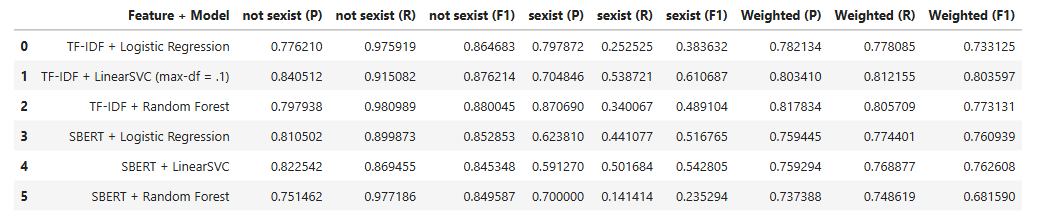

The best performing combination was the TF-IDF + LinearSVC combination with an overall score 0.803. I believe that the TF-IDF feature outperformed the SBERT because of the size of the training sets and the examples in each. TF-IDF specializes for short text like the social media remarks while SBERT specializes in the use of sentences and much larger data sets. LinearSVC was the overall best model because it the top model when both features were applied. The models overall seem to do pretty poorly at identifyin sexist remarks which leads to them being exceptionally good at calling out non sexist text.

## Use of Generative AI

Generative AI was used to create a rough outline of the steps needed to complete the project and decide on which models we will use for the final project. For preprocessing the text, when it came to hashtags Google's search AI and ChatGPT were used to identify the python libraries that already exist for that purpose and implementing them into the preprocess function. ChatGPT was used to create the function that adds the result of each feature and model and formats it into a table that is easy to read for the final display of results. Generative AI was also used to create more instances for our training set. Finally Google search and its AI feature were used to figure out how to fine tune the models for best results.